In [1]:
import uproot
import coffea.hist as hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

#hep.set_style("CMS")

In [2]:
v0_file = "/work/gallim/root_files/vertex_investigation/VertexInvestigation_vtx0/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8_storeWeights_alesauva-UL2018_0-10_6_4-v0-RunIISummer19UL18MiniAOD-106X_upgrade2018_realistic_v11_L1v1-v1-3f96409841a3cc85b911eb441562baae_USER_*.root"
v_custom_file = "/work/gallim/root_files/vertex_investigation/VertexInvestigation/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8_storeWeights_alesauva-UL2018_0-10_6_4-v0-RunIISummer19UL18MiniAOD-106X_upgrade2018_realistic_v11_L1v1-v1-3f96409841a3cc85b911eb441562baae_USER_*.root"

tree_name = "diphotonDumper/trees/ggH_125_13TeV_All_$SYST"

#variables = ['candidate_id', 'weight', 'mass', 'pt', 'eta', 'leadPt', 'subleadPt', 'rho', 'nvtx', 'event', 'lumi', 'processIndex', 'run', 'npu', 'puweight']

specs = {
    'mass': {
        'bins': 80,
        'range': [100, 140]
    },
    'pt': {
        'bins': 80,
        'range': [0, 300]
    },
    'eta': {
        'bins': 80,
        'range': [-5, 5]
    },
    'leadPt': {
        'bins': 80,
        'range': [0, 300]
    },
    'subleadPt': {
        'bins': 80,
        'range': [0, 200]  
    },
    'rho': {
        'bins': 80,
        'range': [0, 50]
    },
    'vtx_z': {
        'bins': 80,
        'range': [-15, 15]
    },
    'gen_vtx_z': {
        'bins': 80,
        'range': [-15, 15]
    }
}
variables = list(specs.keys())

In [9]:
histos = {}

for var, sp in specs.items():
    histos[var] = hist.Hist("Counts", 
                            hist.Cat("vertex", "Vertex"),
                            hist.Bin(var, "${}$".format(var), sp["bins"], *sp["range"])
                           )

In [10]:
%%time

for var, histo in histos.items():
    for batch in uproot.iterate(["{}:{}".format(v_custom_file, tree_name)], expressions=[var, "weight"], library="np"):
        histo.fill(vertex="Vertex Reco", **batch)
    for batch in uproot.iterate(["{}:{}".format(v0_file, tree_name)], expressions=[var, "weight"], library="np"):
        histo.fill(vertex="Vertex 0th", **batch)

CPU times: user 22 s, sys: 97.5 ms, total: 22.1 s
Wall time: 22.1 s


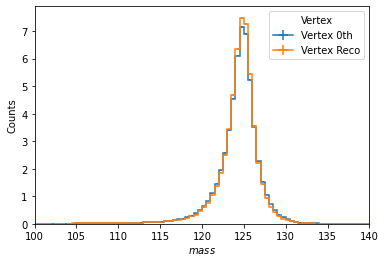

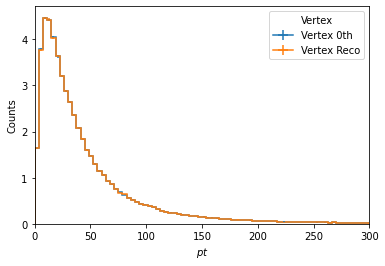

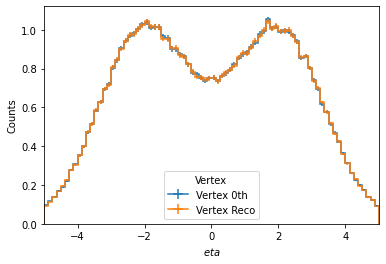

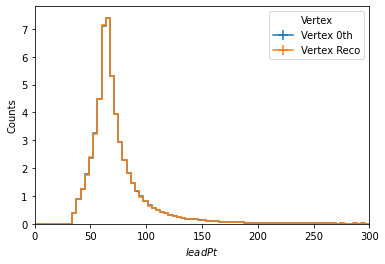

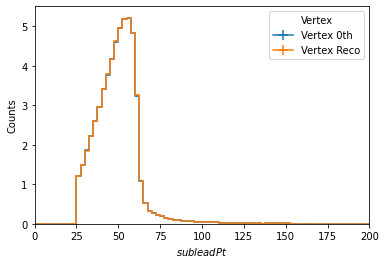

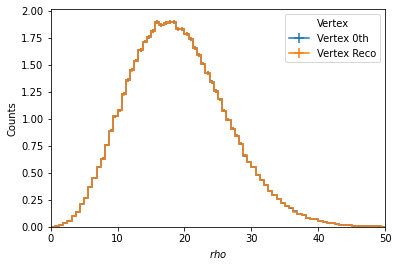

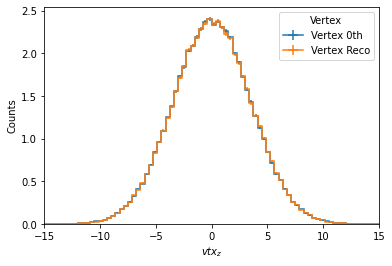

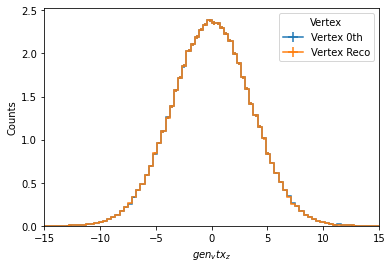

In [11]:
for histo in histos.values():
    fig, ax = plt.subplots()
    hist.plot1d(histo)
    plt.show();

## Useful computations

In [5]:
imp_variables = ["pt", "vtx_z", "gen_vtx_z", "weight"]

arr_vtx0 = uproot.lazy(["{}:{}".format(v0_file, tree_name)], imp_variables)
arr_custom = uproot.lazy(["{}:{}".format(v_custom_file, tree_name)], imp_variables)

In [7]:
diff = abs(arr_custom.gen_vtx_z - arr_custom.vtx_z)

In [8]:
arr_vtx0[arr_vtx0.pt > ]

<Array [0.0028, 0.0014, ... 0.000708, 0.00136] type='986451 * float32'>

In [40]:
len(arr_vtx0[(arr_vtx0['pt'] < 502)&(arr_vtx0['pt'] > 500)])

23

In [41]:
pt_range = np.linspace(0, 300, 25)

pt_ranges = []
inf = pt_range[0]
for sup in pt_range[1:]:
    pt_ranges.append((inf, sup))
    inf = sup

In [64]:
def count_fraction(awk_arr, var, limits):
    vals = []
    for rng in limits:
        part_arr = awk_arr[(awk_arr[var] > rng[0]) & (awk_arr[var] < rng[1])]
        part_arr['diff_z'] = abs(part_arr.gen_vtx_z - part_arr.vtx_z)
        frac = len(part_arr[part_arr.diff_z < 1.]) / len(part_arr)
        vals.append(frac)
    return vals

In [65]:
x_points = [np.mean(rng) for rng in pt_ranges]

In [66]:
y_vtx0 = count_fraction(arr_vtx0, 'pt', pt_ranges)

In [67]:
y_vtxc = count_fraction(arr_custom, 'pt', pt_ranges)

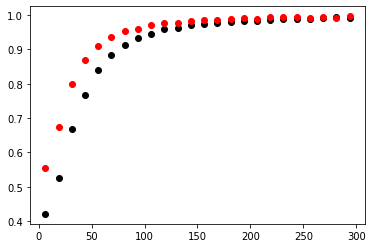

In [70]:
fig, ax = plt.subplots()
plt.plot(x_points, y_vtx0, 'ko')
plt.plot(x_points, y_vtxc, 'ro')
plt.show()

In [71]:
?ax.legend

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to these three different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting the labels manually will result